In [ ]:
!pip install pyDOE

In [ ]:
import numpy as np
from pyDOE import lhs
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cálculo de coeficientes de material PVDF
A continuación se presenta el cálculo de los coeficientes de PVDF. Esto se hace en base a https://es.mathworks.com/help/pde/ug/deflection-of-a-piezoelectric-actuator.html

In [ ]:
scale = 1# 1000 ** 2

In [ ]:
E = 2.0e9 / scale  # Elastic modulus, N/m^2
NU = 0.29  # Poisson's ratio
G = 0.775e9 / scale  # Shear modulus, N/m^2
d31 = 2.2e-11  # Piezoelectric strain coefficients, C/N
d33 = -3.0e-11

rel_permittivity = 12

permittivity_free_space = 8.854187817620e-12 / 1  # F/m
C11 = E / (1 - NU**2)
C12 = NU * C11

In [ ]:
WIDTH = 100e-3
HEIGHT = 1e-3
H2 = HEIGHT/2
CENTER = 0

In [ ]:
Y_TOP = HEIGHT
Y_BOTTOM = 0

In [ ]:
C11, C12

(2183644502.6749644, 633256905.7757397)

In [ ]:
c2d = np.array([[C11, C12, 0], [C12, C11, 0], [0, 0, G]])
pze_D = np.array([[0, d31], [0, d33], [0, 0]])

In [ ]:
pze_E = c2d @ pze_D
D_const_stress = np.array([[rel_permittivity, 0],
                           [0, rel_permittivity]]) * permittivity_free_space

In [ ]:
D_const_strain = D_const_stress - pze_D.T @ pze_E

In [ ]:
cond_scaling = 1

In [ ]:
c11 = np.array([c2d[0, 0], c2d[0, 2], c2d[2, 0], c2d[2, 2]])
c12 = np.array([[c2d[0, 2], c2d[0, 1]], [c2d[2, 2], c2d[1, 2]]])
c21 = c12.T

c22 = np.array([c2d[2, 2], c2d[1, 2], c2d[2, 1], c2d[1, 1]])
c13 = np.array([[pze_E[0, 0], pze_E[0, 1]], [pze_E[2, 0], pze_E[2, 1]]])
c31 = cond_scaling * c13.T
c23 = np.array([[pze_E[2, 0], pze_E[2, 1]], [pze_E[1, 0], pze_E[1, 1]]])
c32 = cond_scaling * c23.T

c33 = cond_scaling * np.array([D_const_strain[0, 0],
                               D_const_strain[1, 0],
                               D_const_strain[0, 1],
                               D_const_strain[1, 1]])

ctop = np.concatenate([c11, c21.flatten(), -c31.flatten(),
                       c12.flatten(), c22, -c32.flatten(),
                       -c13.flatten(), -c23.flatten(), -c33])

cbot = np.concatenate([c11, c21.flatten(), c31.flatten(),
                       c12.flatten(), c22, c32.flatten(),
                       c13.flatten(), c23.flatten(), -c33])

In [ ]:
print(ctop)
print(cbot)

[ 2.18364450e+09  0.00000000e+00  0.00000000e+00  7.75000000e+08
  0.00000000e+00  7.75000000e+08  6.33256906e+08  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.90424719e-02 -0.00000000e+00
  0.00000000e+00  6.33256906e+08  7.75000000e+08  0.00000000e+00
  7.75000000e+08  0.00000000e+00  0.00000000e+00  2.18364450e+09
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.15776832e-02
 -0.00000000e+00 -2.90424719e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  5.15776832e-02
 -1.06250254e-10 -0.00000000e+00 -0.00000000e+00 -1.04063989e-10]
[ 2.18364450e+09  0.00000000e+00  0.00000000e+00  7.75000000e+08
  0.00000000e+00  7.75000000e+08  6.33256906e+08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.90424719e-02  0.00000000e+00
  0.00000000e+00  6.33256906e+08  7.75000000e+08  0.00000000e+00
  7.75000000e+08  0.00000000e+00  0.00000000e+00  2.18364450e+09
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.15776832e-02
  0.00000000e+00  2.9042

In [ ]:
# C11 = C11 * 1e-9
# C12 = C12 * 1e-9
# C22 = C22 * 1e-9
# G = G * 1e-9
C22 = C11
C11, C12, C22, G

(2183644502.6749644, 633256905.7757397, 2183644502.6749644, 775000000.0)

In [ ]:
epsilon_1 = -c33[0]
epsilon_2 = -c33[-1]
epsilon_1, epsilon_2

(-1.0625025381143999e-10, -1.0406398893536182e-10)

In [ ]:
e11_top = -c31[0,0]
e14_top = -c31[0,1]
e13_top = -c31[0,1]
e31_top = -c31[1,0]
e34_top = -c31[1,1]

In [ ]:
e11_bottom = c31[0,0]
e14_bottom = c31[0,1]
e13_bottom = c31[0,1]
e31_bottom = c31[1,0]
e34_bottom = c31[1,1]

In [ ]:
e33_top = -c32[-1, -1]
e33_bottom = c32[-1, -1]

In [ ]:
e11_top, e31_top, e13_top, e33_top, e14_top, e34_top

(-0.0, -0.02904247188557703, -0.0, 0.05157768315318266, -0.0, -0.0)

In [ ]:
e11_bottom, e31_bottom, e13_bottom, e33_bottom, e14_bottom, e34_bottom

(0.0, 0.02904247188557703, 0.0, -0.05157768315318266, 0.0, 0.0)

### Generación de puntos de frontera

In [ ]:
# Función para obtener puntos de frontera para potencial eléctrico
def beam_electric_BC(x, phi_value):
    phi = np.ones((x.shape[0], 1)) * phi_value
    return x, phi

In [ ]:
# Función para obtener puntos de frontera para desplazamiento
def beam_mechanical_BC(x, u_value=0, v_value=0):
    u_left = np.ones((x.shape[0], 1)) * u_value
    v_left = np.ones((x.shape[0], 1)) * v_value
    y_left = np.hstack([u_left, v_left])
    return x, y_left

In [ ]:
# Función para obtener puntos de frontera en la parte superior de la viga
def get_top_x_y(x, y):
    y = np.ones_like(y[-1, :][:, None]) * Y_TOP
    x_top = np.hstack([x[-1, :][:, None], y])
    return x_top

In [ ]:
# Función para obtener puntos de frontera en la parte inferior de la viga
def get_bottom_x_y(x, y):
    y = np.ones_like(y[0, :][:, None]) * Y_BOTTOM
    x_bottom = np.hstack([x[0, :][:, None], y])
    return x_bottom

In [ ]:
# Función para obtener puntos de frontera en la parte izquierda de la viga
def get_left_x_y(x, y):
    sample = lhs(1, x.shape[0])
    x  = np.zeros_like(x[:, 0][:, None])
    y = sample * HEIGHT
    x, y = np.meshgrid(x, y)
    x_left = np.hstack([x[1:-1, 0][:, None], y[1:-1, 0][:, None]])
    return x_left

In [ ]:
# Función para obtener puntos de frontera en la parte derecha de la viga
def get_right_x_y(x, y):
    sample = lhs(1, x.shape[0])
    x  = np.ones_like(x[:, 0][:, None]) * WIDTH
    y = sample * HEIGHT

    x, y = np.meshgrid(x, y)
    x_left = np.hstack([x[:, -1][:, None], y[:, -1][:, None]])
    return x_left

In [ ]:
# Función para obtener los coeficientes de cada punto modelado de la viga
def get_coefficients(x, y):
    C11_array = np.ones((x.flatten().shape[0], 1)) * C11
    C12_array = np.ones((x.flatten().shape[0], 1)) * C12
    C22_array = np.ones((x.flatten().shape[0], 1)) * C22
    G_array = np.ones((x.flatten().shape[0], 1)) * G
    epsilon1_array = np.ones((x.flatten().shape[0], 1)) * epsilon_1
    epsilon2_array = np.ones((x.flatten().shape[0], 1)) * epsilon_2
    e31_array = np.where(y.flatten() < CENTER, e31_bottom, e31_top).reshape(-1, 1)
    e33_array = np.where(y.flatten() < CENTER, e33_bottom, e33_top).reshape(-1, 1)
    return C11_array, C12_array, C22_array, G_array, epsilon1_array, epsilon2_array, e31_array, e33_array

In [ ]:
# Función para obtener los puntos de frontera para el estrés y el desplazamiento eléctrico
def create_BCs_stress_elec(n_samples):
    sample = lhs(2, n_samples)
    x = sample[:, 0] * WIDTH
    y = sample[:, 1] * HEIGHT
    x.sort()
    y.sort()
    x, y = np.meshgrid(x, y)

    xy_top = get_top_x_y(x, y)
    xy_bottom = get_bottom_x_y(x, y)
    xy_left = get_left_x_y(x, y)
    xy_right = get_right_x_y(x, y)

    return xy_top, xy_bottom, xy_left, xy_right

In [ ]:
# Función para obtener las condiciones de frontera para el desplazamiento mecánico y potencial eléctrico
# Esta función se debe usar si no se imponen las condiciones directamente en la red neuronal
def create_BCs(n_samples):
    sample = lhs(2, n_samples)
    x = sample[:, 0] * WIDTH
    y = sample[:, 1] * H2
    x.sort()
    y.sort()
    x, y = np.meshgrid(x, y)
    xy_top = get_top_x_y(x, y)
    xy_bottom = get_bottom_x_y(x, y)
    xy_left = get_left_x_y(x, y)
    x_up, y_up = beam_electric_BC(xy_top, 100)
    x_bottom, y_bottom = beam_electric_BC(xy_bottom, 0)
    x_left, y_left = beam_mechanical_BC(xy_left)
    x_right = get_right_x_y(x, y)
    x_electrical_bc, y_electrical_bc = np.vstack([x_up, x_bottom]), np.vstack([y_up, y_bottom])
    x_mechanical_bc, y_mechanical_bc = x_left, y_left

    return x_electrical_bc, y_electrical_bc, x_mechanical_bc, y_mechanical_bc, x_right

In [ ]:
n_points = 150

In [ ]:
xy_top, xy_bottom, xy_left, xy_right = create_BCs_stress_elec(n_points)

In [ ]:
xy_right.shape

(150, 2)

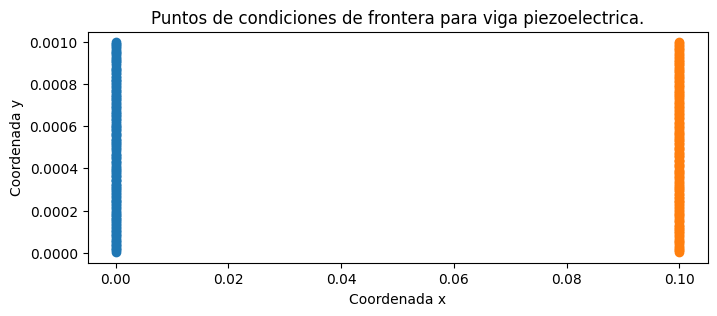

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(xy_left[:, 0], xy_left[:, 1])
plt.scatter(xy_right[:, 0], xy_right[:, 1])
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de condiciones de frontera para viga piezoelectrica.')
plt.show()

In [ ]:
x_electrical_bc, y_electrical_bc, x_mechanical_bc, y_mechanical_bc, x_right = create_beam_geom_BCs(n_points)

<ipython-input-154-7f922ea1da0d>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_right[:, 0], x_right[:, 1], cmap='jet')


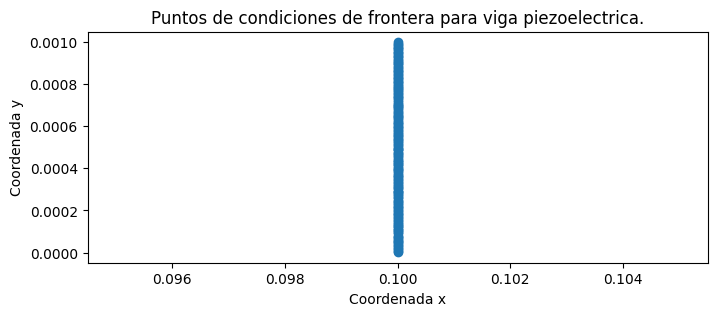

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(x_right[:, 0], x_right[:, 1], cmap='jet')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de condiciones de frontera para viga piezoelectrica.')
plt.show()

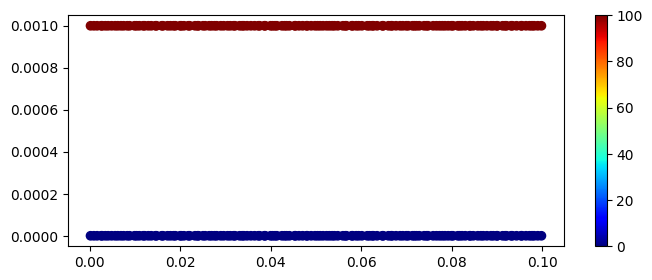

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(x_electrical_bc[:, 0], x_electrical_bc[:, 1], c=y_electrical_bc[:, 0], cmap='jet')
plt.colorbar()
plt.show()

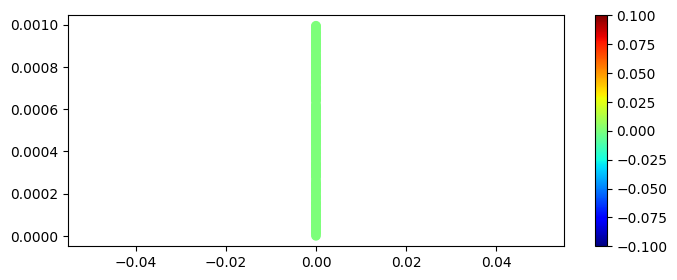

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(x_mechanical_bc[:, 0], x_mechanical_bc[:, 1], c=y_mechanical_bc[:,  1], cmap='jet')
plt.colorbar()
plt.show()

### Generación de puntos de colocación

In [ ]:
# Función para obtener los puntos de coloccación
def get_collocation_points(n_points):
    sample = lhs(2, n_points)
    x = sample[:, 0] * WIDTH
    y = sample[:, 1] * (Y_TOP - Y_BOTTOM) + Y_BOTTOM
    x.sort()
    y.sort()
    x, y = np.meshgrid(x, y)
    C11_array, C12_array, C22_array, G_array, epsilon1_array, epsilon2_array, e31_array, e33_array = get_coefficients(x, y)
    xy = np.hstack([x.flatten()[:, None], y.flatten()[:, None],
                    C11_array, C12_array, C22_array, G_array,
                    epsilon1_array, epsilon2_array, e31_array, e33_array])


    return xy

In [ ]:
x_collocation = get_collocation_points(150)
x_collocation.shape

(22500, 10)

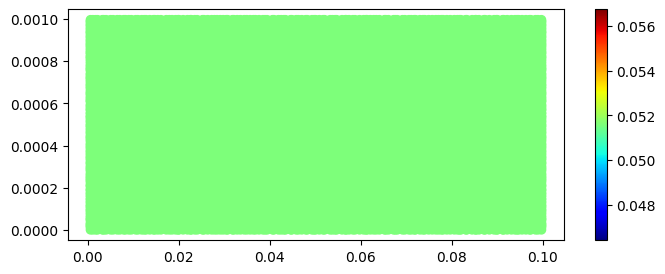

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(x_collocation[:, 0], x_collocation[:,1], c=x_collocation[:, 9], cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
x_collocation_test = get_collocation_points(200)

<ipython-input-161-f61e91e7ae18>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_collocation[:, 0], x_collocation[:,1], cmap='jet')


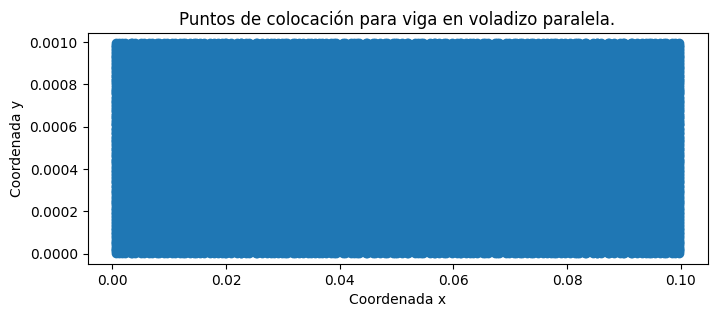

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(x_collocation[:, 0], x_collocation[:,1], cmap='jet')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de colocación para viga en voladizo paralela.')
plt.show()

In [ ]:
np.max(x_collocation[:, 0]), np.max(x_collocation[:, 1])

(0.09974221428195579, 0.000994934155921857)

In [ ]:
x_collocation_test.shape

(40000, 10)

<ipython-input-169-c74e32a59d98>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_collocation_test[:, 0], x_collocation_test[:,1], cmap='jet')


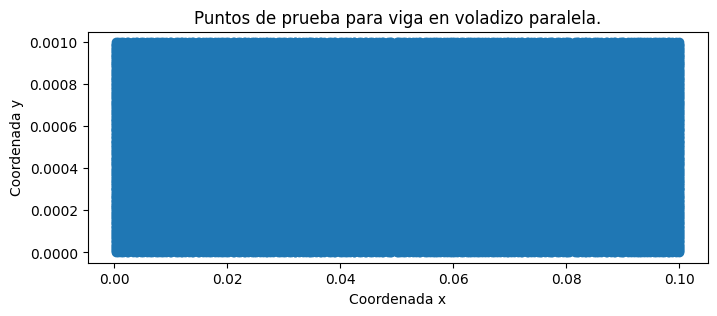

In [ ]:
plt.figure(figsize=(8, 3))
plt.scatter(x_collocation_test[:, 0], x_collocation_test[:,1], cmap='jet')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Puntos de prueba para viga en voladizo paralela.')
plt.show()

In [ ]:
x_electrical_bc.shape, x_collocation.shape

((300, 2), (22500, 10))

In [ ]:
root = '/content/drive/MyDrive/PINN_piezo/'

In [ ]:
# Descomentar para guardarq los datos
# np.save(root + 'x_electrical_bc.npy', x_electrical_bc)
# np.save(root + 'y_electrical_bc.npy', y_electrical_bc)
# np.save(root + 'x_mechanical_bc.npy', x_mechanical_bc)
# np.save(root + 'y_mechanical_bc.npy', y_mechanical_bc)
# np.save(root + 'x_right.npy', x_right)
# np.save(root + 'x_collocation_non_normalized_m1_c.npy', x_collocation)
# np.save(root + 'x_collocation_test_non_normalized_m1_c.npy', x_collocation_test)
# np.save(root + 'xy_top_non_normalized_m1_c.npy', xy_top)
# np.save(root + 'xy_bottom_non_normalized_m1_c.npy', xy_bottom)
# np.save(root + 'xy_left_non_normalized_m1_c.npy', xy_left)
# np.save(root + 'xy_right_non_normalized_m1_c.npy', xy_right)